In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("dataset.json", orient="split")

In [3]:
import pandas as pd
import mlflow

## NOTE: Optionally, you can use the public tracking server.  Do not use it for data you cannot afford to lose. See note in assignment text. If you leave this line as a comment, mlflow will save the runs to your local filesystem.

mlflow.set_tracking_uri("http://training.itu.dk:5000/")

# TODO: Set the experiment name
mlflow.set_experiment("<bkov> - <poly-linreg>")

# Import some of the sklearn modules you are likely to use.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start a run
# TODO: Set a descriptive name. This is optional, but makes it easier to keep track of your runs.
with mlflow.start_run(run_name="run"):
    # TODO: Insert path to dataset
    df = pd.read_json("dataset.json", orient="split")
    
    # TODO: Handle missing data
    df = df.dropna()


    pipeline = Pipeline([
        # TODO: You can start with your pipeline from assignment 1
        ("POLY",PolynomialFeatures()),
        ("linreg",LinearRegression())

    ])

    # TODO: Currently the only metric is MAE. You should add more. What other metrics could you use? Why?
    metrics = [
        ("MAE", mean_absolute_error, []),
        ("MSE", mean_squared_error, []),
        ("R2", r2_score, []),
    ]

    X = df[["Speed"]]
    y = df["Total"]

    number_of_splits = 5

    #TODO: Log your parameters. What parameters are important to log?
    #HINT: You can get access to the transformers in your pipeline using `pipeline.steps`
    
    for train, test in TimeSeriesSplit(number_of_splits).split(X,y):
        pipeline.fit(X.iloc[train],y.iloc[train])
        predictions = pipeline.predict(X.iloc[test])
        truth = y.iloc[test]

        from matplotlib import pyplot as plt 
        plt.plot(truth.index, truth.values, label="Truth")
        plt.plot(truth.index, predictions, label="Predictions")
        plt.legend()
        plt.show()
        
        # Calculate and save the metrics for this fold
        for name, func, scores in metrics:
            score = func(truth, predictions)
            scores.append(score)
    
    # Log a summary of the metrics
    for name, _, scores in metrics:
            # NOTE: Here we just log the mean of the scores. 
            # Are there other summarizations that could be interesting?
            mean_score = sum(scores)/number_of_splits
            mlflow.log_metric(f"mean_{name}", mean_score)

ModuleNotFoundError: No module named 'mlflow'

2022/11/28 12:17:50 INFO mlflow.tracking.fluent: Experiment with name '<bkov> - <poly-knn>' does not exist. Creating a new experiment.


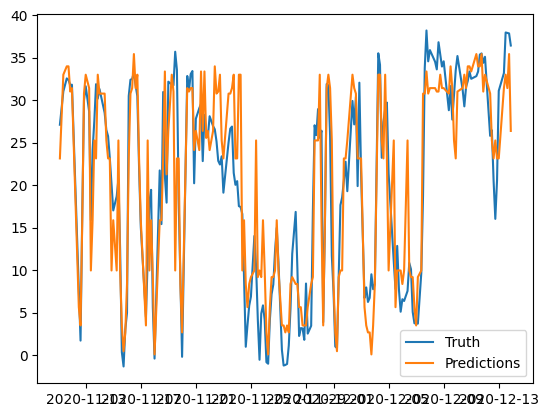

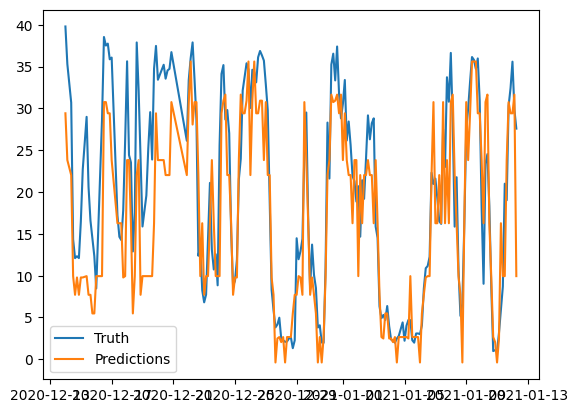

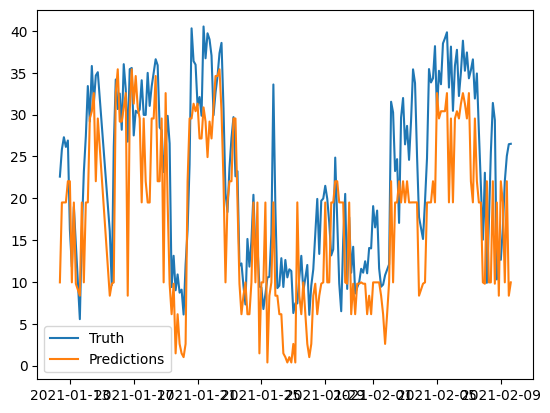

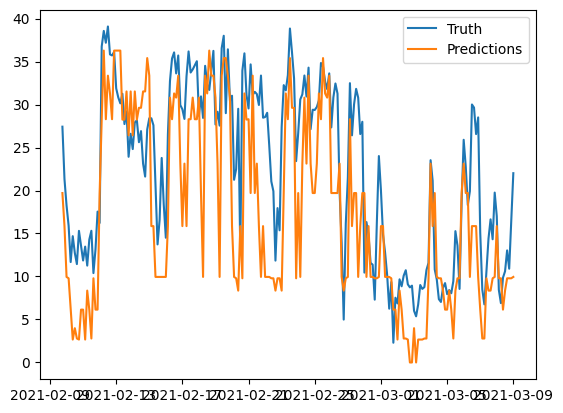

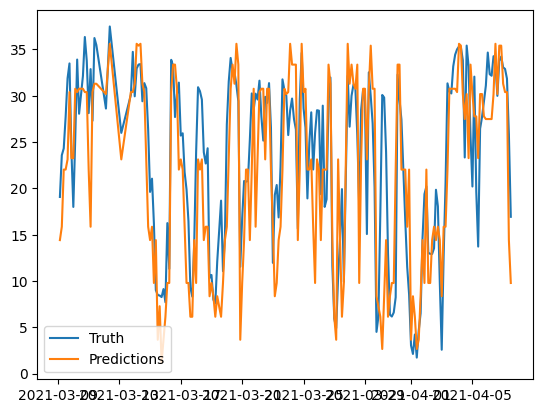

In [27]:
import pandas as pd
import mlflow

## NOTE: Optionally, you can use the public tracking server.  Do not use it for data you cannot afford to lose. See note in assignment text. If you leave this line as a comment, mlflow will save the runs to your local filesystem.

# mlflow.set_tracking_uri("http://training.itu.dk:5000/")

# TODO: Set the experiment name
mlflow.set_experiment("<bkov> - <poly-knn>")

# Import some of the sklearn modules you are likely to use.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start a run
# TODO: Set a descriptive name. This is optional, but makes it easier to keep track of your runs.
with mlflow.start_run(run_name="run"):
    # TODO: Insert path to dataset
    df = pd.read_json("dataset.json", orient="split")
    
    # TODO: Handle missing data
    df = df.dropna()


    pipeline = Pipeline([
        # TODO: You can start with your pipeline from assignment 1
        ("POLY",PolynomialFeatures()),
        ("KNN",KNeighborsRegressor())

    ])

    # TODO: Currently the only metric is MAE. You should add more. What other metrics could you use? Why?
    metrics = [
        ("MAE", mean_absolute_error, []),
        ("MSE", mean_squared_error, []),
        ("R2", r2_score, []),
    ]

    X = df[["Speed"]]
    y = df["Total"]

    number_of_splits = 5

    #TODO: Log your parameters. What parameters are important to log?
    #HINT: You can get access to the transformers in your pipeline using `pipeline.steps`
    
    for train, test in TimeSeriesSplit(number_of_splits).split(X,y):
        pipeline.fit(X.iloc[train],y.iloc[train])
        predictions = pipeline.predict(X.iloc[test])
        truth = y.iloc[test]

        from matplotlib import pyplot as plt 
        plt.plot(truth.index, truth.values, label="Truth")
        plt.plot(truth.index, predictions, label="Predictions")
        plt.legend()
        plt.show()
        
        # Calculate and save the metrics for this fold
        for name, func, scores in metrics:
            score = func(truth, predictions)
            scores.append(score)
    
    # Log a summary of the metrics
    for name, _, scores in metrics:
            # NOTE: Here we just log the mean of the scores. 
            # Are there other summarizations that could be interesting?
            mean_score = sum(scores)/number_of_splits
            mlflow.log_metric(f"mean_{name}", mean_score)

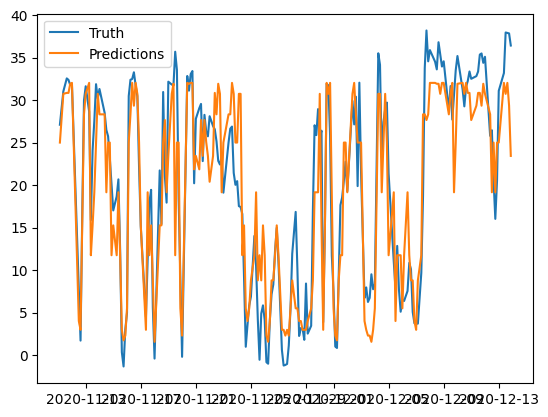

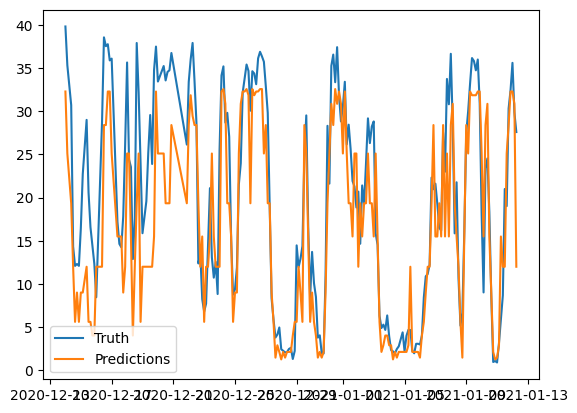

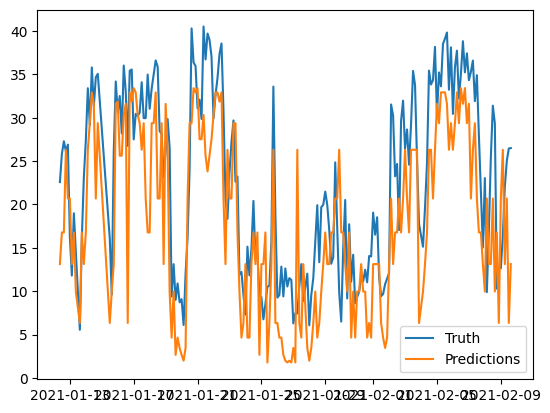

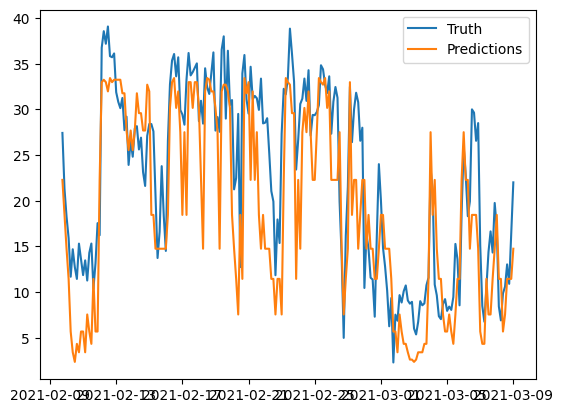

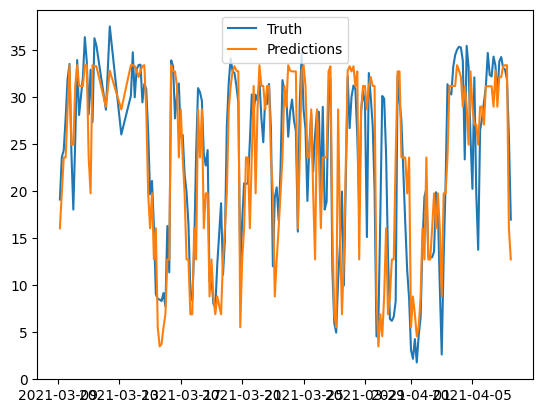

In [26]:
import pandas as pd
import mlflow

## NOTE: Optionally, you can use the public tracking server.  Do not use it for data you cannot afford to lose. See note in assignment text. If you leave this line as a comment, mlflow will save the runs to your local filesystem.

mlflow.set_tracking_uri("http://training.itu.dk:5000/")

# TODO: Set the experiment name
mlflow.set_experiment("<bkov> - <poly-svr>")

# Import some of the sklearn modules you are likely to use.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start a run
# TODO: Set a descriptive name. This is optional, but makes it easier to keep track of your runs.
with mlflow.start_run(run_name="run"):
    # TODO: Insert path to dataset
    df = pd.read_json("dataset.json", orient="split")
    
    # TODO: Handle missing data
    df = df.dropna()


    pipeline = Pipeline([
        # TODO: You can start with your pipeline from assignment 1
        ("POLY",PolynomialFeatures()),
        ("SVR",SVR()),

    ])

    # TODO: Currently the only metric is MAE. You should add more. What other metrics could you use? Why?
    metrics = [
        ("MAE", mean_absolute_error, []),
        ("MSE", mean_squared_error, []),
        ("R2", r2_score, []),
    ]

    X = df[["Speed"]]
    y = df["Total"]

    number_of_splits = 5

    #TODO: Log your parameters. What parameters are important to log?
    #HINT: You can get access to the transformers in your pipeline using `pipeline.steps`
    
    for train, test in TimeSeriesSplit(number_of_splits).split(X,y):
        pipeline.fit(X.iloc[train],y.iloc[train])
        predictions = pipeline.predict(X.iloc[test])
        truth = y.iloc[test]

        from matplotlib import pyplot as plt 
        plt.plot(truth.index, truth.values, label="Truth")
        plt.plot(truth.index, predictions, label="Predictions")
        plt.legend()
        plt.show()
        
        # Calculate and save the metrics for this fold
        for name, func, scores in metrics:
            score = func(truth, predictions)
            scores.append(score)
    
    # Log a summary of the metrics
    for name, _, scores in metrics:
            # NOTE: Here we just log the mean of the scores. 
            # Are there other summarizations that could be interesting?
            mean_score = sum(scores)/number_of_splits
            mlflow.log_metric(f"mean_{name}", mean_score)